<a href="https://colab.research.google.com/github/dLobatog/kaggle-competitions/blob/main/Sartorius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    %cd /content/drive/MyDrive/Colab\ Notebooks/kaggle
    from setup_colab import setup_colab_for_kaggle
    setup_colab_for_kaggle(check_env=False, local_working=True)
except:
    print("Not in Colab")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/kaggle
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Content of Drive Kaggle data dir (/content/drive/MyDrive/kaggle): ['/content/drive/MyDrive/kaggle/input', '/content/drive/MyDrive/kaggle/output']
Content of Kaggle data dir (/kaggle): ['/kaggle/working', '/kaggle/input', '/kaggle/output']
Content of Kaggle data subdir (/kaggle/input): []
Content of Kaggle data subdir (/kaggle/output): []
Content of Kaggle data subdir (/kaggle/working): []


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!mkdir sartorius
%cd sartorius
!mkdir train
!mkdir test
TRAIN_CSV = "train.csv"
TRAIN_PATH = "train"
TEST_PATH = "test"

mkdir: cannot create directory ‘sartorius’: File exists
/content/drive/MyDrive/Colab Notebooks/kaggle/sartorius


In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 58 kB 3.2 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=925e198a1898407428c189192786cc1dbd2ad40c22d8d5812a471cc14a4d4096
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
!kaggle competitions download -c sartorius-cell-instance-segmentation 

100% 2.30G/2.31G [00:16<00:00, 151MB/s]
100% 2.31G/2.31G [00:16<00:00, 149MB/s]


In [ ]:
!unzip sartorius-cell-instance-segmentation.zip

In [ ]:
import pandas as pd
import cv2
import numpy as np
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train['annotation'][0]

'118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4'

In [ ]:
def decodeRLE(annotation, imgShape=(520,704)):
    s = annotation.split(' ')
    pixelList = []
    for i in range(len(s)//2):
        start = int(s[2*i])
        increment = int(s[2*i+1])
        for j in range(start,start+increment):
            pixelList.append(j)
    annotation = np.zeros(imgShape).flatten()
    annotation[pixelList] = 1.
    annotation = annotation.reshape(imgShape)
    return annotation

decodeRLE(train['annotation'][0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

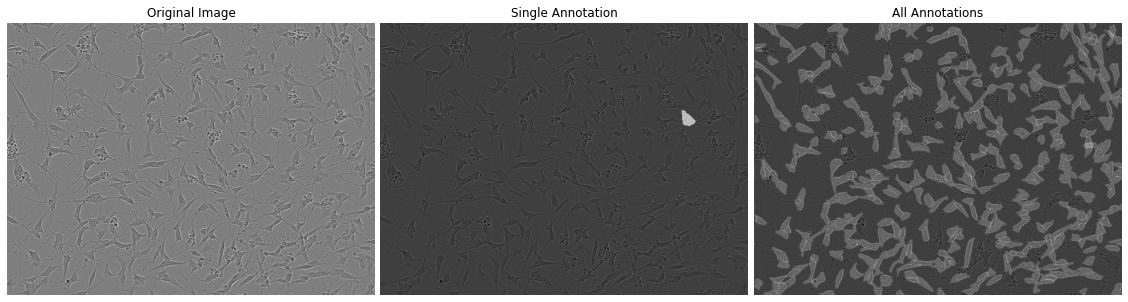

In [ ]:
imageID = '0030fd0e6378'

fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.subplots_adjust(wspace=0.01)

# Load the image
img = read_image('train/' + imageID + '.png').squeeze()
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Single Annotation
singleAnnotation = decodeRLE(train.iloc[0,1])
plt.subplot(132)
plt.imshow(img, cmap='gray')
plt.imshow(singleAnnotation, cmap='gray', alpha=0.5)
plt.title('Single Annotation')
plt.axis('off')

# All annotations
allAnnotations = np.zeros(img.shape)
train_subset = train[train['id']==imageID]
for index, row in train_subset.iterrows():
    allAnnotations += decodeRLE(row.annotation)
plt.subplot(133)
plt.imshow(img, cmap='gray')
plt.imshow(allAnnotations, cmap='gray', alpha=0.5)
plt.title('All Annotations')
plt.axis('off')

plt.show()

In [ ]:
train[train['id']==imageID]

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
390,0030fd0e6378,264628 3 265328 8 266028 12 266729 15 267432 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
391,0030fd0e6378,268853 4 269553 10 270255 12 270958 12 271661 ...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
392,0030fd0e6378,2095 1 2798 3 3501 5 4203 7 4906 9 5609 10 631...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
393,0030fd0e6378,105571 3 106274 5 106978 5 107682 6 108386 6 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
